In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

In [2]:
import os


def get_title(test, key, plot):
    return (
        "{d:d} Dimensions, {p:d} Points, {k:d} Clusters"
        "  |  Oracle Normalized {metric}"
        "  |  {plot}".format(metric=defs.SCORES.get(key, key), plot=plot, **test))

def get_filename(test, key, plot):
        
    p = "./plots/p1_{plot}_{metric}/d={d},p={p},k={k}.pdf".format(
        metric=key, plot=plot, **test)

    if not os.path.exists(os.path.dirname(p)):
        os.makedirs(os.path.dirname(p))
    
    return p

In [3]:
def make_phase1(plot, key, title=True, save=False):
    
    for t in defs.TESTS_P1:
        fig, ax = plt.subplots(1, 1, figsize=(6.5, 3))
        
        if title:
            ax.set_title(get_title(t, key, plot=plot.DESC))
        plot.plot(key, t, ax)
        if save:
            plt.savefig(get_filename(t, key, plot.NAME), bbox_inches='tight')

In [4]:
class Boxplot:
    
    NAME = 'boxplot'
    DESC = 'Boxplots, sorted by median'
    
    def plot(self, key, t, ax):
        
        median, data, labels = util.get_data(
            summary, t, key, sortstat=np.median, methods=defs.METHODS_P1)
        colors = ['C0' if b.startswith('DPM') else 'C1' for b in labels]

        bp = ax.boxplot(data, 0, '.', vert=False, patch_artist=True)
        for box, color in zip(bp['boxes'], colors):
            box.set(color=color)
        plt.setp(bp['medians'], color='black')

        ax.yaxis.grid()
        ax.set_yticklabels(labels)


In [7]:
class StandardError:
    
    NAME = 'se'
    DESC = 'Mean and 2SE intervals, sorted by mean'
    
    MIN_VAL = 0.8

    def plot(self, key, t, ax):

        means, data, labels = util.get_data(
            summary, t, key, sortstat=np.mean, methods=defs.METHODS_P1)
        stderr = [stats.sem(d) * 2 for d in data]
        colors = ['C0' if b.startswith('DPM') else 'C1' for b in labels]

        for idx, (mean, err, color) in enumerate(zip(means, stderr, colors)):
            ax.errorbar([mean], [idx], xerr=[err], fmt='o', color=color, capsize=5)
            if mean + err < self.MIN_VAL:
                ax.arrow(self.MIN_VAL + 0.01, idx, -0.005, 0, color=color, head_width=0.3, head_length=0.002)

        ax.yaxis.grid()
        ax.yaxis.set_ticks(np.arange(len(defs.METHODS_P1)))
        ax.set_xlim(0.8, 1)
        ax.set_yticklabels(labels)

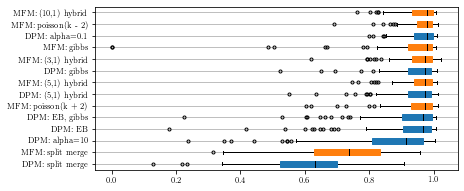

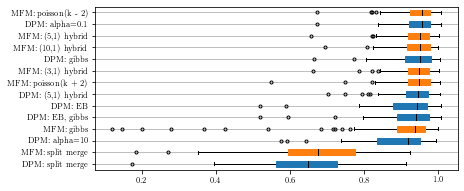

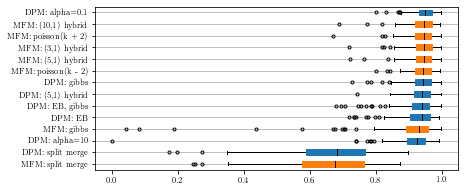

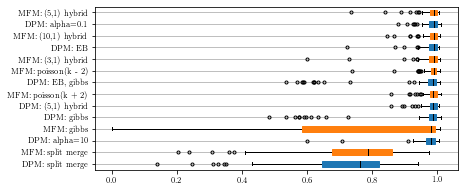

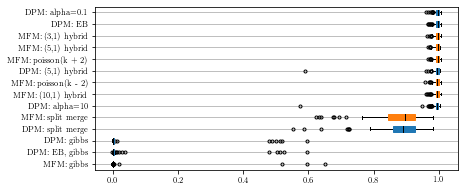

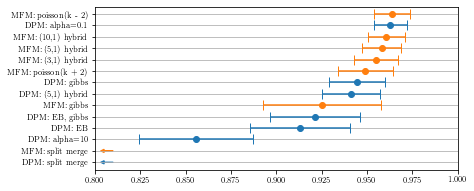

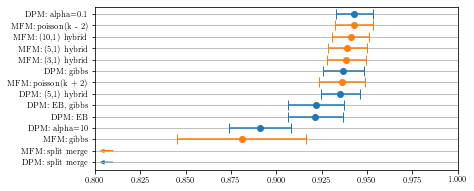

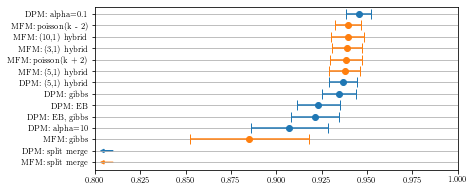

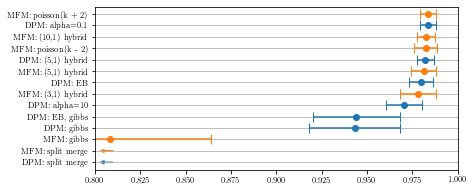

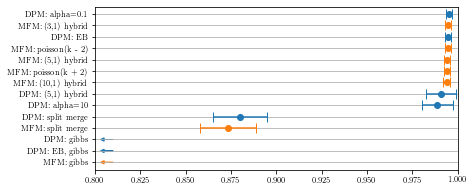

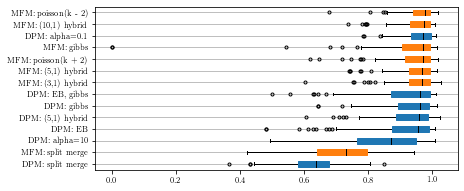

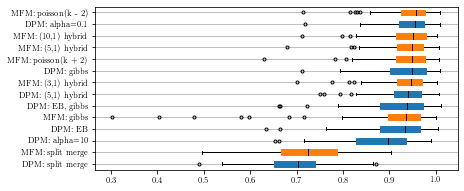

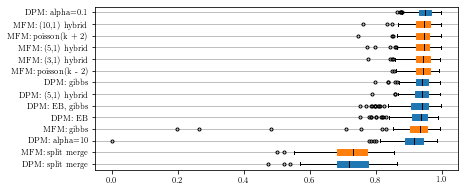

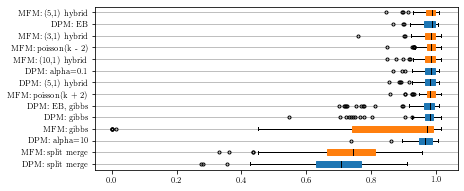

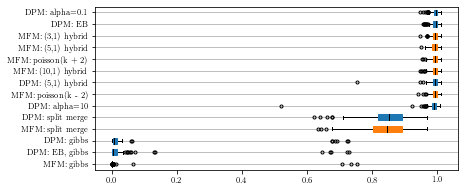

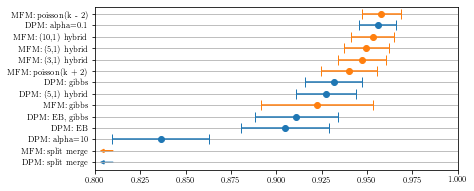

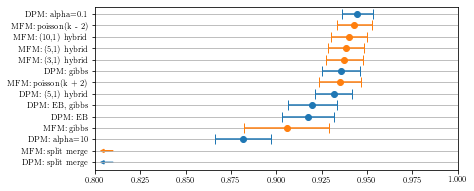

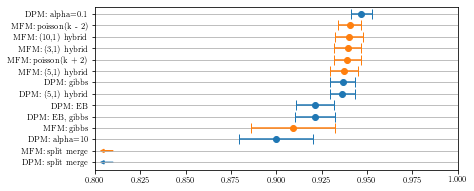

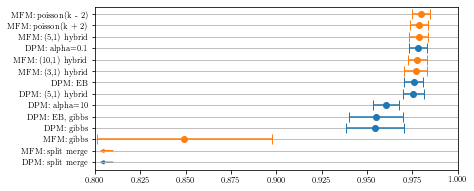

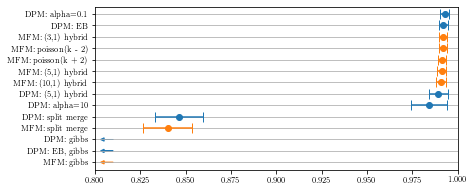

In [8]:
for key in ['rand', 'nmi']:
    for plot in [Boxplot(), StandardError()]:
        make_phase1(plot, key, title=False, save=True)